# Rasterio Introduction
Documentation for this library could be accesses using this [Link]()

In [1]:
import rasterio
rasterio.__version__
import matplotlib.pyplot as plt

### Reading a raster data

In [2]:
img1 = rasterio.open('Demo1.tif')
img1

C:\Users\psingh24\Miniconda3\lib\site-packages\rasterio\__init__.py:228: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


<open DatasetReader name='Demo1.tif' mode='r'>

In [3]:
# Read the tif file as numpy array
img_data1 = img1.read()

In [4]:
img_data1

array([[[17952, 13616, 12656, ..., 11360, 13104, 12048],
        [12000, 10176, 14368, ..., 10352, 12928, 15328],
        [15200, 11792, 17296, ..., 10624, 13936, 18640],
        ...,
        [35392, 33120, 31888, ..., 33472, 39264, 44688],
        [39840, 31792, 32080, ..., 34128, 34832, 38064],
        [37264, 31248, 31760, ..., 38768, 39056, 42864]]], dtype=uint16)

In [5]:
img_data1.shape

(1, 960, 1280)

### Reading metadata of the raster

In [6]:
# Getting the number of bands in the image
print('No. of bands in the image is: ', img1.count)

No. of bands in the image is:  1


In [7]:
print('Width of image is: ', img1.width)

Width of image is:  1280


In [8]:
print('Height of image is: ', img1.height)

Height of image is:  960


In [9]:
img_data1.dtype

dtype('uint16')

In [10]:
print('Minimum value in the img_data1 is: ', img_data1.min())

Minimum value in the img_data1 is:  7328


In [11]:
print('Maximum value in the img_data1 is: ', img_data1.max())

Maximum value in the img_data1 is:  65520


In [12]:
# reading whole meta data 
img1.meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': None,
 'width': 1280,
 'height': 960,
 'count': 1,
 'crs': None,
 'transform': Affine(1.0, 0.0, 0.0,
        0.0, 1.0, 0.0)}

### Visualization of raster data

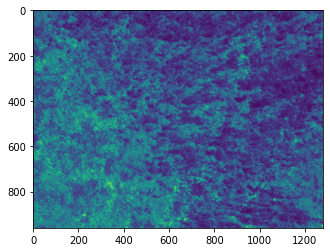

<AxesSubplot:>

In [13]:
from rasterio.plot import show, show_hist

show(img1)

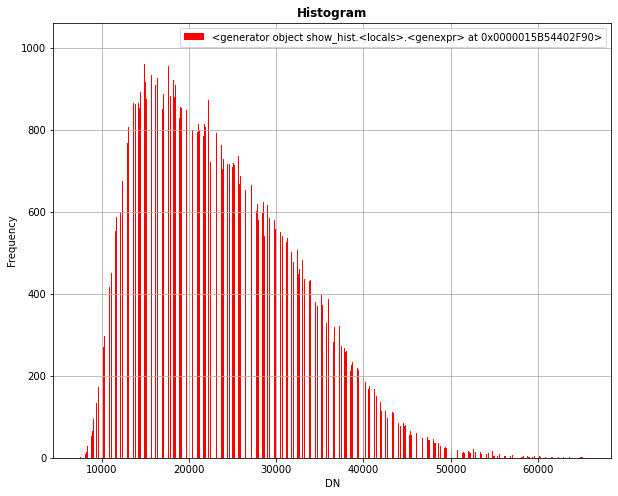

In [14]:
plt.figure(figsize = (10,8))
show_hist(img1, bins = 10000)

### Writing raster data 
process to create a new .tif file

In [15]:
with rasterio.open(r'output/O_1.tif', 'w',
                  driver = img1.driver,
                  height = img1.width,
                  width = img1.height,
                  count = img1.count,
                  crs = img1.crs,
                  transform = img1.transform, 
                  dtype = img_data1.dtype) as dst:
    dst.write(img_data1)

C:\Users\psingh24\Miniconda3\lib\site-packages\rasterio\__init__.py:238: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  s = writer(path, mode, driver=driver,


In [16]:
with rasterio.open(r'output/Output1.tif', 'w',
                  driver = img1.driver,
                  height = 452,
                  width = 89,
                  count = img1.count,
                  crs = img1.crs,
                  transform = img1.transform, 
                  dtype = img_data1.dtype) as dst:
    dst.write(img_data1)

### Reading a new .tif file
The image read is a RGB image

In [17]:
img2 = rasterio.open('June8.tif')
img2

<open DatasetReader name='June8.tif' mode='r'>

In [18]:
img_data2 = img2.read()
img_data2.shape

(3, 17977, 11241)

In [19]:
# Getting the number of bands in the image
print('No. of bands in the image is: ', img2.count)

No. of bands in the image is:  3


In [20]:
print('Width of image is: ', img2.width)

Width of image is:  11241


In [21]:
print('Height of image is: ', img2.height)

Height of image is:  17977


In [22]:
print('Minimum value in the data2 is: ', img_data2.min())

Minimum value in the data2 is:  0


In [23]:
print('Maximum value in the data2 is: ', img_data2.max())

Maximum value in the data2 is:  255


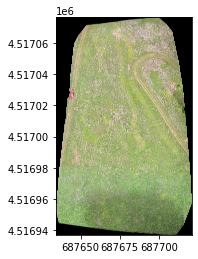

<AxesSubplot:>

In [24]:
show(img2)

In [25]:
# Reading different bands in an image separetely
img2a = img2.read(1)
img2b = img2.read(2)
img2c = img2.read(3)

In [26]:
# results is a 3d array
img_data2.shape

(3, 17977, 11241)

In [27]:
# result is a 2d array
img2a.shape

(17977, 11241)

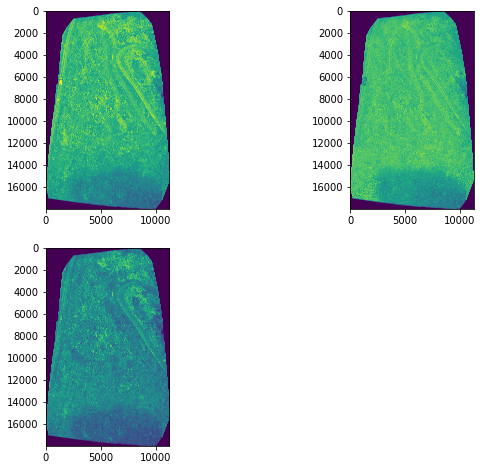

In [28]:
# Reading three different bands in sub-plots
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img2a)
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(img2b)
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(img2c)
plt.show()

## NDVI - Normalized difference vegetation index
<b>NDVI is a common measure in remote sensing for agriculture — capturing how much more near infrared light is reflected compared to visible red. It helps differentiate bare soil from grass or forest, detect plants under stress, and differentiate between crops and crop stages.</b><br>
<br><b>Formula </b>= (NIR-R) / (NIR+R)

In [29]:
# Check datatype of 'img2a'
img2a.dtype

dtype('uint8')

We will convert the existing 'uint8' datatype into 'floating' datatype that will help us to tackle the round off errors in the calculation

In [30]:
# Converting the datatype
NIR = img2a.astype('f8')
R = img2b.astype('f8')

In [31]:
NIR.dtype

dtype('float64')

In [32]:
# Calculating NDVI
# NDVI = NIR - R /(NIR + R)
NDVI = (NIR - R) / (NIR + R)

C:\Users\psingh24\AppData\Local\Temp\ipykernel_16228\1779214587.py:3: RuntimeWarning: invalid value encountered in true_divide
  NDVI = (NIR - R) / (NIR + R)


In [33]:
NDVI.shape

(17977, 11241)

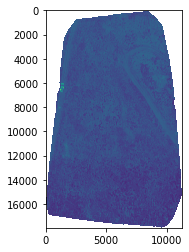

In [34]:
plt.imshow(NDVI)

## GNDVI - Green normalized difference vegetation index 
GNDVI index uses visible green instead of visible red and near infrared. Useful for measuring rates of photosynthesis and monitoring the plant stress.<br>
<b>Formula </b>= (NIR - G) / (NIR + G)

## NDRE - Normalized difference red edge index 
The normalized difference red edge index (NDRE) is a metric that can be used to analyse whether images obtained from multi-spectral image sensors contain healthy vegetation or not.<br>
<b>Formula </b> = (NIR - RedEdge) / (NIR + RedEdge)

# Tutorial - Project 2 

In [35]:
import rasterio
from rasterio import mask
import fiona
import numpy as np
import matplotlib.pyplot as plt

In [36]:
red = rasterio.open('UAV_images/0604_red.tif')
red.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -10000.0,
 'width': 4533,
 'height': 7753,
 'count': 1,
 'crs': CRS.from_epsg(32614),
 'transform': Affine(0.020450000000000003, 0.0, 572896.61659,
        0.0, -0.020450000000000003, 4492579.35096)}

In [37]:
red = red.read(1)
red.shape

(7753, 4533)

In [38]:
red.min()

-10000.0

In [39]:
red.max()

0.33227277

In [40]:
# Using np.where to replace all negative values in the array with 0
red = np.where(red>0, red, 0)
red

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [41]:
red = rasterio.open('UAV_images/0604_red.tif')
out_meta = red.meta
red = red.read(1)
red.shape

(7753, 4533)

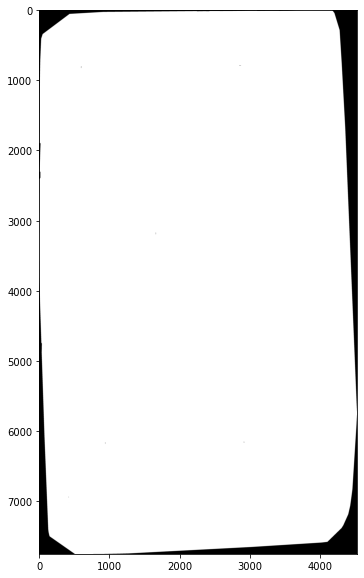

In [42]:
plt.figure(figsize=(10,10))
plt.imshow(red, cmap = 'gray')
plt.show()

In [43]:
red

array([[-10000., -10000., -10000., ..., -10000., -10000., -10000.],
       [-10000., -10000., -10000., ..., -10000., -10000., -10000.],
       [-10000., -10000., -10000., ..., -10000., -10000., -10000.],
       ...,
       [-10000., -10000., -10000., ..., -10000., -10000., -10000.],
       [-10000., -10000., -10000., ..., -10000., -10000., -10000.],
       [-10000., -10000., -10000., ..., -10000., -10000., -10000.]],
      dtype=float32)

<b>We want to view the image for the file we are opening using rasterio library, 
The problem being faced by us is that it has high negative values at the corners which prouces a BW image and does not produce a grayscale image of the field</b>

In [44]:
red.min()

-10000.0

In [45]:
red.max()

0.33227277

In [46]:
# We will change the values of (-10000) wherever it is present in the image - We do this using numpy library

# np.where((locations where we do not want to see the change), (name of the array), (value to be assigned as replacement))
red = np.where(red > 0, red, 0)
red

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [47]:
red.min()

0.0

In [48]:
red.max()

0.33227277

In [49]:
nir = rasterio.open('UAV_images/0604_nir.tif')
nir = nir.read(1)

nir = np.where(nir > 0, nir, 0)

In [50]:
nir

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [51]:
ndvi = (nir-red)/(nir+red)

C:\Users\psingh24\AppData\Local\Temp\ipykernel_16228\1342287713.py:1: RuntimeWarning: invalid value encountered in true_divide
  ndvi = (nir-red)/(nir+red)


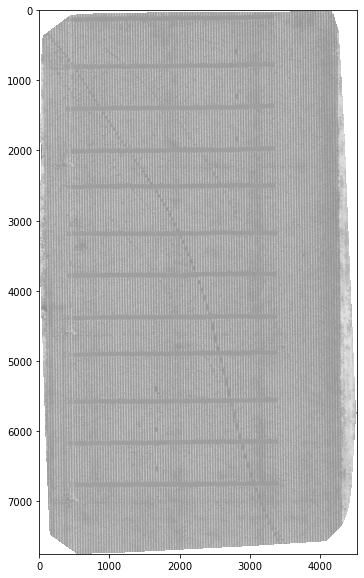

In [52]:
# %matplotlib qt
plt.figure(figsize=(10,10))
plt.imshow(ndvi, cmap = 'gray')
plt.show()

In [53]:
ndvi.shape

(7753, 4533)

In [54]:
out_meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -10000.0,
 'width': 4533,
 'height': 7753,
 'count': 1,
 'crs': CRS.from_epsg(32614),
 'transform': Affine(0.020450000000000003, 0.0, 572896.61659,
        0.0, -0.020450000000000003, 4492579.35096)}

In [55]:
ndvi = np.reshape(ndvi, (1, ndvi.shape[0], ndvi.shape[1]))
ndvi.shape

(1, 7753, 4533)

In [56]:
with rasterio.open('OutputClass/ndvi0604.tif', 'w', **out_meta) as dest:
    dest.write(ndvi)

### You need to make these changes in each image before calculation of the respective VI's
i.e. before performing calculations like -<b> ndvi = (nir-red)/(nir+red)</b>

In [57]:
shapefile = fiona.open('Shapefile/Treatment.shp', 'r')
shapefile

<open Collection 'Shapefile/Treatment.shp:Treatment', mode 'r' at 0x15b5d9bd220>

In [58]:
# Features are being read in the shapefile
for features in shapefile:
    print(features)
    break

{'type': 'Feature', 'id': '0', 'properties': OrderedDict([('Id', 0), ('plotID', 101)]), 'geometry': {'type': 'Polygon', 'coordinates': [[(572909.0741400151, 4492451.823517375), (572913.770503574, 4492451.889663344), (572913.9106734619, 4492441.937601374), (572909.214309901, 4492441.871455407), (572909.0741400151, 4492451.823517375)]]}}


In [59]:
for features in shapefile:
    x = features
    break
x

{'type': 'Feature',
 'id': '0',
 'properties': OrderedDict([('Id', 0), ('plotID', 101)]),
 'geometry': {'type': 'Polygon',
  'coordinates': [[(572909.0741400151, 4492451.823517375),
    (572913.770503574, 4492451.889663344),
    (572913.9106734619, 4492441.937601374),
    (572909.214309901, 4492441.871455407),
    (572909.0741400151, 4492451.823517375)]]}}

In [60]:
x['properties']

OrderedDict([('Id', 0), ('plotID', 101)])

In [61]:
x['geometry']

{'type': 'Polygon',
 'coordinates': [[(572909.0741400151, 4492451.823517375),
   (572913.770503574, 4492451.889663344),
   (572913.9106734619, 4492441.937601374),
   (572909.214309901, 4492441.871455407),
   (572909.0741400151, 4492451.823517375)]]}

You can read about `List comprehension` topic using [Link](https://www.w3schools.com/python/python_lists_comprehension.asp)

Refer to [Link](https://rasterio.readthedocs.io/en/latest/topics/masking-by-shapefile.html) to know on how to make a raster using a shapefile

In [62]:
x = []
for features in shapefile:
    x.append(features)
x

[{'type': 'Feature',
  'id': '0',
  'properties': OrderedDict([('Id', 0), ('plotID', 101)]),
  'geometry': {'type': 'Polygon',
   'coordinates': [[(572909.0741400151, 4492451.823517375),
     (572913.770503574, 4492451.889663344),
     (572913.9106734619, 4492441.937601374),
     (572909.214309901, 4492441.871455407),
     (572909.0741400151, 4492451.823517375)]]}},
 {'type': 'Feature',
  'id': '1',
  'properties': OrderedDict([('Id', 0), ('plotID', 104)]),
  'geometry': {'type': 'Polygon',
   'coordinates': [[(572933.5806536706, 4492452.072106438),
     (572938.2770172296, 4492452.138252407),
     (572938.4171871174, 4492442.1861904375),
     (572933.7208235565, 4492442.12004447),
     (572933.5806536706, 4492452.072106438)]]}},
 {'type': 'Feature',
  'id': '2',
  'properties': OrderedDict([('Id', 0), ('plotID', 107)]),
  'geometry': {'type': 'Polygon',
   'coordinates': [[(572957.9185226327, 4492452.417986359),
     (572962.6148861917, 4492452.484132329),
     (572962.7550560795, 449

In [63]:
shapes = [feature["geometry"] for feature in shapefile]
shapes

[{'type': 'Polygon',
  'coordinates': [[(572909.0741400151, 4492451.823517375),
    (572913.770503574, 4492451.889663344),
    (572913.9106734619, 4492441.937601374),
    (572909.214309901, 4492441.871455407),
    (572909.0741400151, 4492451.823517375)]]},
 {'type': 'Polygon',
  'coordinates': [[(572933.5806536706, 4492452.072106438),
    (572938.2770172296, 4492452.138252407),
    (572938.4171871174, 4492442.1861904375),
    (572933.7208235565, 4492442.12004447),
    (572933.5806536706, 4492452.072106438)]]},
 {'type': 'Polygon',
  'coordinates': [[(572957.9185226327, 4492452.417986359),
    (572962.6148861917, 4492452.484132329),
    (572962.7550560795, 4492442.532070359),
    (572958.0586925186, 4492442.4659243915),
    (572957.9185226327, 4492452.417986359)]]},
 {'type': 'Polygon',
  'coordinates': [[(572909.0259165554, 4492463.992391602),
    (572913.7222801144, 4492464.058537572),
    (572913.8624500022, 4492454.106475602),
    (572909.1660864414, 4492454.040329634),
    (572909.

In [64]:
src = rasterio.open('OutputClass/ndvi0604.tiff')

In [65]:
shapefile = fiona.open('Shapefile/Treatment.shp', 'r')
shapes = [[features['geometry'] for features in shapefile][3]]

In [66]:
shapes

[{'type': 'Polygon',
  'coordinates': [[(572909.0259165554, 4492463.992391602),
    (572913.7222801144, 4492464.058537572),
    (572913.8624500022, 4492454.106475602),
    (572909.1660864414, 4492454.040329634),
    (572909.0259165554, 4492463.992391602)]]}]

In [67]:
out_image, out_transform = rasterio.mask.mask(src, shapes, nodata = 0, crop=True)
out_meta = src.meta

In [68]:
NDVI = np.mean(out_image)
NDVI

0.3049037

In [69]:
NDVI = []
for i in range(27):
    src = rasterio.open('OutputClass/ndvi0604.tiff')
    shapefile = fiona.open('Shapefile/Treatment.shp', 'r')
    shapes = [[features['geometry'] for features in shapefile][i]]
    
    out_image, out_transform = rasterio.mask.mask(src, shapes, nodata = 0, crop=True)
    out_meta = src.meta
    
    NDVI.append(np.mean(out_image))
NDVI

[0.31581283,
 0.30257696,
 0.268008,
 0.3049037,
 0.313353,
 0.29154968,
 0.319431,
 0.30421206,
 0.28624967,
 0.26714793,
 0.27466214,
 0.3006376,
 0.3129768,
 0.28472227,
 0.3296955,
 0.3004247,
 0.30489644,
 0.31538534,
 0.28375635,
 0.297198,
 0.30480778,
 0.29009163,
 0.31765205,
 0.29891682,
 0.2877331,
 0.33190984,
 0.2819581]